## Objective:

To find how every library is behaving compared to each other. 

1. Vader 

2. LM

3. Pattern

4. H 


## Method: 

1. Year 2021

2. Randomly selecting 6 months 

3. Randomly select 5 days from each month

4. So you will work with 30 days. 

### Process:

1. Selecting the random 30 dates, making a list of them. 

2. Passing those list of dates through every library function.

3. From every output, we need to extract the relevant columns and store them in a dictionary.

4. This dictionary will be made to a data frame finally. 

5. If we use pairwise scatter plot on that, the work is done. 


Note 1: Since I'm only dealing with one year, at the point of preparing dictionary, we can club both years and prepare the final dictionary. 

Note 2: Here, since I'm less aware of parallel computing, used many for loops. This is computationally expensive.

In [1]:
import os
os.chdir(r"C:\Users\sreek\Documents\1. Praxis\3. Term 3\3. CAPP- New\Data\3. Individual dates\Individual dates")

In [5]:
# Slecting a list of 6 months randomly 
import random

In [8]:
months = random.sample(range(1,13),6) # Not doing seed here as we can check for different correlations and save 

In [11]:
month_names = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

In [28]:
# Now the random sample of months is generated, I just need to extract dates from those months, 5 dates each.

dates = {}
for  i in months:
    dates[i]=(random.sample(range(1,31),5))
    
print(dates)

{11: [23, 8, 26, 17, 20], 7: [13, 22, 26, 17, 29], 3: [12, 17, 3, 9, 18], 1: [25, 26, 18, 22, 1], 12: [16, 30, 24, 8, 15], 10: [21, 10, 20, 9, 15]}


In [45]:
list_dates = []
for i in months:
    for j in dates[i]:
        list_dates.append(str(j) +" "+ month_names[i-1]+','+" "+'2021'+'.csv')
print(list_dates)

['23 Nov, 2021.csv', '8 Nov, 2021.csv', '26 Nov, 2021.csv', '17 Nov, 2021.csv', '20 Nov, 2021.csv', '13 Jul, 2021.csv', '22 Jul, 2021.csv', '26 Jul, 2021.csv', '17 Jul, 2021.csv', '29 Jul, 2021.csv', '12 Mar, 2021.csv', '17 Mar, 2021.csv', '3 Mar, 2021.csv', '9 Mar, 2021.csv', '18 Mar, 2021.csv', '25 Jan, 2021.csv', '26 Jan, 2021.csv', '18 Jan, 2021.csv', '22 Jan, 2021.csv', '1 Jan, 2021.csv', '16 Dec, 2021.csv', '30 Dec, 2021.csv', '24 Dec, 2021.csv', '8 Dec, 2021.csv', '15 Dec, 2021.csv', '21 Oct, 2021.csv', '10 Oct, 2021.csv', '20 Oct, 2021.csv', '9 Oct, 2021.csv', '15 Oct, 2021.csv']


In [46]:
len(list_dates) #6 months. # 30 days. #Great!

30

### Now, we need to check using each library. 

# 1. Vader 

In [47]:
#importing libraries
import pandas as pd
import numpy as np
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [48]:
def sentiment_analysis(file_name,col):
    
    article=pd.read_csv(file_name, date_parser="date_published")

    article.drop(["Unnamed: 0"], axis=1, inplace=True)

    #creating new empty columns
    article['compound_score']=''
    #importing vader library and it's necessary objects
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    sid_obj = SentimentIntensityAnalyzer()
    for i in range(article.shape[0]):
        paragraph=article[col][i]

        sentiment_dict = sid_obj.polarity_scores(str(paragraph))

        article['compound_score'][i]=sentiment_dict['compound']
             
    return article

In [69]:
vadercscore = []
for i in list_dates:
    article = sentiment_analysis(i,"full_text")
    for j in list(article['compound_score']):
        vadercscore.append(j) #Since I want for every day in the list 
#Create a dict we will convert this to data frame later. 
final_dict = {"VaderCscore":vadercscore}
final_dict

# Since I couldn't figure out parallel processing, I'm going ahead with for loops right now.:-)
# It's taking time and taxing on the machine 
# The result is the compound scores of every article every day for 30 days. 

{'VaderCscore': [0.9184,
  0.7783,
  -0.1002,
  -0.1002,
  0.0,
  -0.1002,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.9943,
  0.993,
  0.9533,
  0.9921,
  0.9781,
  0.995,
  0.0,
  0.8891,
  0.9768,
  0.9768,
  0.892,
  0.9848,
  0.9633,
  0.9878,
  -0.5647,
  0.0,
  0.5852,
  0.9705,
  0.9875,
  0.9875,
  0.9913,
  0.9913,
  -0.9253,
  -0.6486,
  -0.6486,
  0.9972,
  0.9688,
  0.9688,
  0.9392,
  -0.7543,
  0.9705,
  0.9705,
  0.9801,
  -0.2471,
  0.9972,
  0.9716,
  0.9912,
  -0.9444,
  0.9364,
  -0.8271,
  -0.9543,
  0.9377,
  -0.9979,
  0.0,
  0.9641,
  -0.9815,
  0.9994,
  0.9903,
  0.0,
  0.9367,
  0.6745,
  0.0,
  0.999,
  0.9705,
  0.0,
  0.8984,
  -0.7407,
  0.9966,
  0.0,
  0.0,
  0.9983,
  -0.9371,
  0.352,
  0.9993,
  0.9842,
  0.9744,
  -0.9974,
  0.9918,
  0.5878,
  0.0,
  -0.2732,
  0.9979,
  0.9937,
  0.8658,
  0.9848,
  0.9042,
  -0.7463,
  -0.9873,
  0.9022,
  0.9887,
  0.9852,
  0.9308,
  0.9601,
  0.9601,
  0.9539,
  0.0,
  0.8779,
  0.9779,
  0.9713,
  0.9679,
  0.9532

# 2. Pattern 



In [56]:
def pattern_analysis(file_name,col):
    article=pd.read_csv(file_name, date_parser="date_published")
    article.drop(["Unnamed: 0"], axis=1, inplace=True)
    
    
    #creating new empty columns
    article['polarity']=''  
    from pattern.en import sentiment
    for i in range(article.shape[0]):
        paragraph=article[col][i]
        output = list(sentiment(paragraph))

        article['polarity'][i]= output[0]
    return article  

In [70]:
pattern_polarity = []
for i in list_dates:
    article = pattern_analysis(i,"full_text")
    for j in list(article['polarity']):
        pattern_polarity.append(j) #Since I want for every day in the list 
#Create a dict we will convert this to data frame later. 
final_dict["pattern_polarity"]=pattern_polarity
final_dict

{'VaderCscore': [0.9184,
  0.7783,
  -0.1002,
  -0.1002,
  0.0,
  -0.1002,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.9943,
  0.993,
  0.9533,
  0.9921,
  0.9781,
  0.995,
  0.0,
  0.8891,
  0.9768,
  0.9768,
  0.892,
  0.9848,
  0.9633,
  0.9878,
  -0.5647,
  0.0,
  0.5852,
  0.9705,
  0.9875,
  0.9875,
  0.9913,
  0.9913,
  -0.9253,
  -0.6486,
  -0.6486,
  0.9972,
  0.9688,
  0.9688,
  0.9392,
  -0.7543,
  0.9705,
  0.9705,
  0.9801,
  -0.2471,
  0.9972,
  0.9716,
  0.9912,
  -0.9444,
  0.9364,
  -0.8271,
  -0.9543,
  0.9377,
  -0.9979,
  0.0,
  0.9641,
  -0.9815,
  0.9994,
  0.9903,
  0.0,
  0.9367,
  0.6745,
  0.0,
  0.999,
  0.9705,
  0.0,
  0.8984,
  -0.7407,
  0.9966,
  0.0,
  0.0,
  0.9983,
  -0.9371,
  0.352,
  0.9993,
  0.9842,
  0.9744,
  -0.9974,
  0.9918,
  0.5878,
  0.0,
  -0.2732,
  0.9979,
  0.9937,
  0.8658,
  0.9848,
  0.9042,
  -0.7463,
  -0.9873,
  0.9022,
  0.9887,
  0.9852,
  0.9308,
  0.9601,
  0.9601,
  0.9539,
  0.0,
  0.8779,
  0.9779,
  0.9713,
  0.9679,
  0.9532

In [71]:
# Checking if both are of the same length

len(final_dict["pattern_polarity"]),len(final_dict["VaderCscore"])
# Awesome!

(11691, 11691)

# 3. LM

In [74]:
pip install pysentiment2

Note: you may need to restart the kernel to use updated packages.


In [75]:
import pysentiment2 as ps

In [89]:
def lm_analysis(file_name,col):
    
    article=pd.read_csv(file_name, date_parser="date_published")

    article.drop(["Unnamed: 0"], axis=1, inplace=True)

    #creating new empty columns
    article['lm_polarity']=''
    lm = ps.LM()
    from nltk.tokenize import word_tokenize
    for i in range(article.shape[0]):
        paragraph=article[col][i]
        try:
            tokens = word_tokenize(paragraph)
            score = lm.get_score(tokens)
            article['lm_polarity'][i]=score['Polarity']
        except:
            "Tokenize error"

        
             
    return article

In [90]:
lm_polarity = []
for i in list_dates:
    article = lm_analysis(i,"full_text")
    for j in list(article['lm_polarity']):
        lm_polarity.append(j) #Since I want for every day in the list 
#Create a dict we will convert this to data frame later. 
final_dict["lm_polarity"]=lm_polarity
final_dict

{'VaderCscore': [0.9184,
  0.7783,
  -0.1002,
  -0.1002,
  0.0,
  -0.1002,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.9943,
  0.993,
  0.9533,
  0.9921,
  0.9781,
  0.995,
  0.0,
  0.8891,
  0.9768,
  0.9768,
  0.892,
  0.9848,
  0.9633,
  0.9878,
  -0.5647,
  0.0,
  0.5852,
  0.9705,
  0.9875,
  0.9875,
  0.9913,
  0.9913,
  -0.9253,
  -0.6486,
  -0.6486,
  0.9972,
  0.9688,
  0.9688,
  0.9392,
  -0.7543,
  0.9705,
  0.9705,
  0.9801,
  -0.2471,
  0.9972,
  0.9716,
  0.9912,
  -0.9444,
  0.9364,
  -0.8271,
  -0.9543,
  0.9377,
  -0.9979,
  0.0,
  0.9641,
  -0.9815,
  0.9994,
  0.9903,
  0.0,
  0.9367,
  0.6745,
  0.0,
  0.999,
  0.9705,
  0.0,
  0.8984,
  -0.7407,
  0.9966,
  0.0,
  0.0,
  0.9983,
  -0.9371,
  0.352,
  0.9993,
  0.9842,
  0.9744,
  -0.9974,
  0.9918,
  0.5878,
  0.0,
  -0.2732,
  0.9979,
  0.9937,
  0.8658,
  0.9848,
  0.9042,
  -0.7463,
  -0.9873,
  0.9022,
  0.9887,
  0.9852,
  0.9308,
  0.9601,
  0.9601,
  0.9539,
  0.0,
  0.8779,
  0.9779,
  0.9713,
  0.9679,
  0.9532

In [97]:
final_dict["lm_polarity"] #Because I used try and except, we got some null values. We can try and solve this problem 
# But in the interest of studying pattern, this shouldn't be a major issue. 

[0.9999990000010001,
 0.0,
 -0.9999997500000625,
 -0.9999997500000625,
 '',
 -0.9999997500000625,
 '',
 '',
 '',
 '',
 '',
 0.0,
 -0.199999960000008,
 0.33333322222225925,
 -0.9999999333333378,
 0.0,
 0.0,
 '',
 0.33333322222225925,
 -0.9999990000010001,
 -0.9999990000010001,
 -0.9999990000010001,
 -0.8181817438016598,
 -0.19999998000000202,
 0.0,
 -0.9999996666667778,
 '',
 -0.33333322222225925,
 0.0,
 0.0,
 0.0,
 0.9999997500000625,
 0.9999997500000625,
 0.9999990000010001,
 -0.9999996666667778,
 -0.9999996666667778,
 0.9999997500000625,
 -0.33333322222225925,
 -0.33333322222225925,
 -0.1428571224489825,
 -0.99999980000004,
 0.0,
 0.0,
 0.33333322222225925,
 -0.9999997500000625,
 0.9999990000010001,
 0.49999987500003124,
 0.0,
 -0.99999950000025,
 -0.9999990000010001,
 0.33333322222225925,
 -0.9999996666667778,
 -0.1428571224489825,
 -0.99999980000004,
 '',
 0.99999950000025,
 -0.9999990000010001,
 0.99999980000004,
 -0.33333327777778704,
 '',
 0.9999990000010001,
 -0.199999980000002

In [98]:
final_dict.keys()

dict_keys(['VaderCscore', 'pattern_polarity', 'lm_polarity'])

# 4. Harvard IV-4

In [ ]:
 hiv4 = ps.HIV4()
tokens = hiv4.tokenize(text)      # text can be tokenized by other ways
                                  # however, dict in HIV4 is preprocessed
                                  # by the default tokenizer in the library
score = hiv4.get_score(tokens)

In [113]:
def H_analysis(file_name,col):
    
    article=pd.read_csv(file_name, date_parser="date_published")

    article.drop(["Unnamed: 0"], axis=1, inplace=True)
    hiv4 = ps.HIV4()
    from nltk.tokenize import word_tokenize
    #creating new empty columns
    article['H_polarity']=''
    for i in range(article.shape[0]):
        paragraph=article[col][i]
        try:
            tokens = word_tokenize(paragraph) #I'm taking this as otherwise there is so much error which is to be sorted. 
            score = hiv4.get_score(tokens)
            article['H_polarity'][i]=score['Polarity']
        except:
            print("Tokenize error")                  
    return article

In [114]:
H_polarity = []
for i in list_dates:
    article = H_analysis(i,"full_text")
    for j in list(article['H_polarity']):
        H_polarity.append(j) #Since I want for every day in the list 
#Create a dict we will convert this to data frame later. 
final_dict["H_polarity"]= H_polarity
final_dict["H_polarity"]

Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize error
Tokenize e

[0.8461537810650938,
 0.0,
 0.1304347769376184,
 0.1304347769376184,
 '',
 0.1304347769376184,
 '',
 '',
 '',
 '',
 '',
 0.9999999333333378,
 0.3207547109291564,
 0.6249999609375024,
 -0.333333319444445,
 0.99999980000004,
 0.599999940000006,
 '',
 0.07692307100591762,
 0.4999999375000079,
 0.4999999375000079,
 0.7999999200000081,
 0.14285713605442207,
 0.36842103324099823,
 0.99999980000004,
 0.599999940000006,
 '',
 -0.4999999375000079,
 0.9999990000010001,
 0.9999998333333611,
 0.9999998333333611,
 0.0,
 0.0,
 0.33333327777778704,
 0.0,
 0.0,
 0.8461537810650938,
 0.4285713673469475,
 0.4285713673469475,
 0.05882352595155729,
 -0.07692307100591762,
 0.6666666111111158,
 0.6666666111111158,
 0.09090908264462885,
 -0.19999998000000202,
 0.4999999750000012,
 0.07692307100591762,
 0.6249999609375024,
 0.07692307100591762,
 0.0,
 0.4999999375000079,
 0.4545454132231443,
 0.8571427959183717,
 -0.18918918407596802,
 '',
 0.6666665555555741,
 0.33333329629630043,
 0.6571428383673475,
 -0.25

# Final Data Frame 

In [119]:
final_dataframe = pd.DataFrame(final_dict)

In [120]:
final_dataframe.shape

(11691, 4)

In [122]:
len(final_dataframe.H_polarity[final_dataframe.H_polarity==""]) #Checking for number of nulls 

1196

In [123]:
1196/11691 #10% nulls came because we could'nt sort that error. 

0.10230091523394064

In [131]:
len(final_dataframe.lm_polarity[final_dataframe.lm_polarity==""]) #Checking for number of nulls 

0

In [128]:
final_dataframe.lm_polarity[final_dataframe.lm_polarity==""] = "NA"
final_dataframe.H_polarity[final_dataframe.H_polarity==""] = "NA"

C:\Users\sreek\AppData\Local\Temp/ipykernel_16872/3398385286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe.lm_polarity[final_dataframe.lm_polarity==""] = "NA"
C:\Users\sreek\AppData\Local\Temp/ipykernel_16872/3398385286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe.H_polarity[final_dataframe.H_polarity==""] = "NA"


In [132]:
final_dataframe.isna().sum()

VaderCscore         0
pattern_polarity    0
lm_polarity         0
H_polarity          0
dtype: int64

In [ ]:
# Same number of nulls in lm also. 

### Scatter Plot 


In [125]:
import seaborn as sns

In [133]:
final_dataframe

,VaderCscore,pattern_polarity,lm_polarity,H_polarity
0,0.9184,0.018669,0.999999,0.846154
1,0.7783,-0.020833,0.0,0.0
2,-0.1002,0.015231,-1.0,0.130435
3,-0.1002,0.015231,-1.0,0.130435
4,0.0000,0.000000,NA,NA
...,...,...,...,...
11686,0.9811,0.046531,0.0,0.176471
11687,-0.9867,-0.038754,-0.333333,0.5
11688,0.9464,0.156000,-0.2,0.333333
11689,0.7335,0.052922,0.999999,0.6


In [143]:
final_dataframe.lm_polarity[final_dataframe.lm_polarity=="NaN"] = np.nan
final_dataframe.H_polarity[final_dataframe.H_polarity=="NaN"] = np.nan

C:\Users\sreek\AppData\Local\Temp/ipykernel_16872/449604737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe.lm_polarity[final_dataframe.lm_polarity=="NaN"] = np.nan
C:\Users\sreek\AppData\Local\Temp/ipykernel_16872/449604737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe.H_polarity[final_dataframe.H_polarity=="NaN"] = np.nan


In [151]:
fd = final_dataframe.dropna()

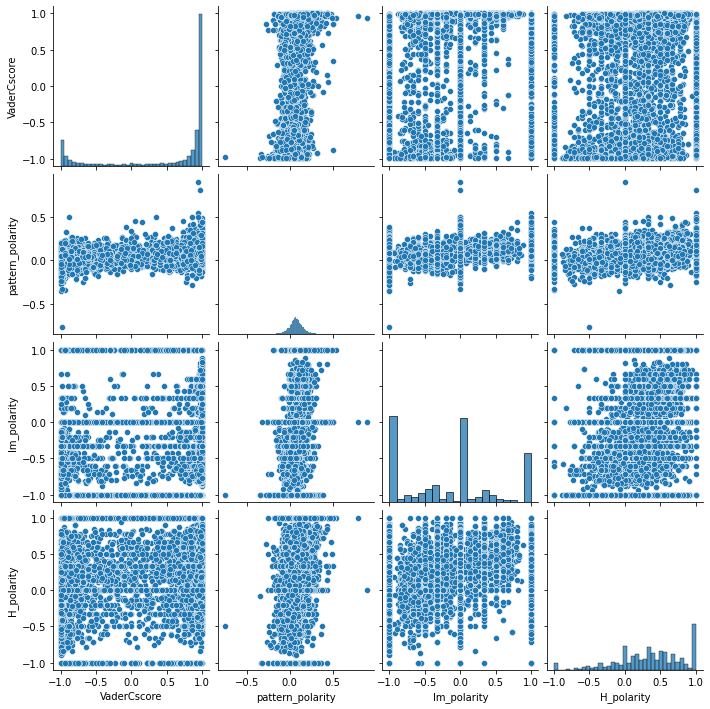

In [152]:
sns.pairplot(fd)

In [160]:
fd.to_csv("Final polarity data.csv")

In [163]:
pd.read_csv("Final polarity data.csv").drop("Unnamed: 0",axis =1).corr()

,VaderCscore,pattern_polarity,lm_polarity,H_polarity
VaderCscore,1.000000,0.373515,0.351311,0.372206
pattern_polarity,0.373515,1.000000,0.260711,0.216624
lm_polarity,0.351311,0.260711,1.000000,0.353302
H_polarity,0.372206,0.216624,0.353302,1.000000


# Observation: 

A very little correlation is observed. 